# Project 4 K-Nearest Neighbors On Two Data Sets

## Part 1: Cleveland Data Set

In [291]:
#Common imports for use in the data visualization
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import csv
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score


from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_recall_fscore_support

In [292]:
clevelandDf = pd.read_csv('datasets/cleveland.csv')

clevelandDf.replace('?', np.nan, inplace=True)

clevelandDf['num'] = (clevelandDf['num'] > 0).astype(int)

clevelandDf.dropna(inplace=True)

selected_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = clevelandDf[selected_features]
y = clevelandDf['num']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

best_k = 1  # test others
nn = NearestNeighbors(n_neighbors=best_k, metric='euclidean', algorithm='auto')
nn.fit(X_train)

distances, indices = nn.kneighbors(X_test)
predictions = [np.any(y_train.iloc[indices[i]] > 0) for i in range(len(X_test))]  # Considering any non-zero prediction as heart disease

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("K value:", best_k)
print("Selected attributes:", selected_features)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

K value: 1
Selected attributes: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Precision: 0.84
Recall: 0.875
F1 score: 0.8571428571428571


- As I messed around with different K values, I relaized that as I went up, we got worse. This is because of overfitting. As we made the model more complex than it needs to be, we started getting more and more incorrect. But as our K decreased, our scores went up, leading us to go with a lower K.

In [293]:
new_data = pd.read_csv('datasets/cleveland-test-sample.csv')

new_data.replace('?', np.nan, inplace=True)
new_data.dropna(inplace=True)
X_new = new_data[selected_features]

X_new_scaled = scaler.transform(X_new)

nn = NearestNeighbors(n_neighbors=best_k, metric='euclidean', algorithm='auto')
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_new_scaled)
predictions = [np.any(y.iloc[indices[i]] > 0) for i in range(len(X_new_scaled))]  # Consider any non-zero prediction as heart disease

print("Predictions for new dataset:")
print(predictions)

Predictions for new dataset:
[False, True, False, False, False, False, True, True, False, False, True, True, True, True, True, False, False, False, True, False, True, False, False, True, False, False, True, False, False, True, False, True, True, False, True, False, True, True, False]


## Part 2: Student Dropout Data Set

## [Student Dropout Dataset ("data.csv") here](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

In [300]:
school_df = pd.read_csv('datasets/data.csv', sep=';')
interested_columns = ["Age at enrollment", "Tuition fees up to date", "Previous qualification (grade)", "Scholarship holder", "Target"]
school_interested = school_df[interested_columns].copy()

dropout_count = school_interested['Target'].value_counts().get('Dropout')
not_dropout_count = (school_interested['Target'] != 'dropout').sum()

school_interested['Age standardized'] = (school_interested['Age at enrollment'] - school_interested['Age at enrollment'].mean()) / (school_interested['Age at enrollment'].std())
school_interested['Tuition standardized'] = (school_interested['Tuition fees up to date'] - school_interested['Tuition fees up to date'].mean()) / (school_interested['Tuition fees up to date'].std())
school_interested['Grades standardized'] = (school_interested['Previous qualification (grade)'] - school_interested['Previous qualification (grade)'].mean()) / (school_interested['Previous qualification (grade)'].std())
school_interested['Scholarship standardized'] = (school_interested['Scholarship holder'] - school_interested['Scholarship holder'].mean()) / (school_interested['Scholarship holder'].std())

school_interested = school_interested.sort_values(by='Scholarship holder', ascending=False)

# Choosing 9 neighbors as the optimal k. Different values of k tested in the plot below
nn = NearestNeighbors(n_neighbors=9, metric='euclidean', algorithm='auto')

# Standarize each metric to reduce bias
age = 'Age standardized'
grade = 'Grades standardized'
tuition = 'Tuition standardized'
scholarship = 'Scholarship standardized'

student = school_interested.sample(1)
studentX = student[[age, grade, tuition, scholarship]].values[0]		# moved this block above
display(student)

# Getting rid of the student of interest as a potential neighbor
X = school_interested.drop(student.index)[[age, grade, tuition, scholarship]].values

fit = nn.fit(X)
distances, indices = fit.kneighbors([studentX])
distances, indices

nbrs = school_interested.iloc[indices[0]]
display(nbrs)

in_school = nbrs[(nbrs['Target'] == "Enrolled") | (nbrs['Target'] == "Graduate")].count()
dropout = nbrs[nbrs['Target'] == "Dropout"].count()
#print('in school: {}\ndropout: {}'.format(in_school, dropout))

prediction = "isn't a dropout" if in_school['Target'] > dropout['Target'] else "is a dropout"
print("We predict this student is: " + prediction)


,Age at enrollment,Tuition fees up to date,Previous qualification (grade),Scholarship holder,Target,Age standardized,Tuition standardized,Grades standardized,Scholarship standardized
4405,18,1,160.0,1,Graduate,-0.693895,0.368094,2.076585,1.739193


,Age at enrollment,Tuition fees up to date,Previous qualification (grade),Scholarship holder,Target,Age standardized,Tuition standardized,Grades standardized,Scholarship standardized
3436,18,1,160.0,1,Graduate,-0.693895,0.368094,2.076585,1.739193
302,18,1,160.0,1,Graduate,-0.693895,0.368094,2.076585,1.739193
2617,19,1,118.0,1,Graduate,-0.562104,0.368094,-1.108049,1.739193
1796,18,1,160.0,1,Graduate,-0.693895,0.368094,2.076585,1.739193
3457,19,1,160.0,1,Graduate,-0.562104,0.368094,2.076585,1.739193
1123,19,1,160.0,1,Graduate,-0.562104,0.368094,2.076585,1.739193
2310,19,1,160.0,1,Graduate,-0.562104,0.368094,2.076585,1.739193
2770,18,1,134.0,1,Graduate,-0.693895,0.368094,0.105145,1.739193
3263,18,1,162.0,1,Graduate,-0.693895,0.368094,2.228234,1.739193


We predict this student is: isn't a dropout


In [295]:
# Repeating experiment from above, but running multiple tests
n = 50
students = school_interested.sample(n)
studentsX = students[[age, grade, tuition, scholarship]].values
studentsY = students[['Target']].values

studentsY = students[['Target']].values.flatten()
studentsY = np.where(studentsY == 'Enrolled', 0, studentsY)
studentsY = np.where(studentsY == 'Graduate', 0, studentsY)
studentsY = np.where(studentsY == 'Dropout', 1, studentsY)
studentsY = studentsY.reshape(-1, 1).astype(np.int64)

distances, indices = fit.kneighbors(studentsX)

y_pred = []
for i in range(n):
    nbrs = school_interested.iloc[indices[i]]
    in_school = nbrs[(nbrs['Target'] == "Enrolled") | (nbrs['Target'] == "Graduate")].count()
    dropout = nbrs[nbrs['Target'] == "Dropout"].count()
    predict = 0 if (in_school['Target'] > dropout['Target']) else 1
    y_pred.append(predict)

# F-score tends to be around 0.75
(p,r,f,s) = precision_recall_fscore_support(studentsY, y_pred, labels=[0,1])
print(f'precision={p}, recall={r}, f-score={f}, support={s}')

precision=[0.66666667 0.71428571], recall=[0.85714286 0.45454545], f-score=[0.75       0.55555556], support=[28 22]


[(array([0.85, 0.7 ]), array([0.91891892, 0.53846154]), array([0.88311688, 0.60869565]), array([37, 13], dtype=int64)), (array([0.6097561 , 0.55555556]), array([0.86206897, 0.23809524]), array([0.71428571, 0.33333333]), array([29, 21], dtype=int64)), (array([0.76315789, 0.66666667]), array([0.87878788, 0.47058824]), array([0.81690141, 0.55172414]), array([33, 17], dtype=int64)), (array([0.65789474, 0.75      ]), array([0.89285714, 0.40909091]), array([0.75757576, 0.52941176]), array([28, 22], dtype=int64)), (array([0.84615385, 0.72727273]), array([0.91666667, 0.57142857]), array([0.88, 0.64]), array([36, 14], dtype=int64)), (array([0.72093023, 0.71428571]), array([0.93939394, 0.29411765]), array([0.81578947, 0.41666667]), array([33, 17], dtype=int64)), (array([0.72093023, 1.        ]), array([1.        , 0.36842105]), array([0.83783784, 0.53846154]), array([31, 19], dtype=int64)), (array([0.72972973, 0.53846154]), array([0.81818182, 0.41176471]), array([0.77142857, 0.46666667]), array(

Text(0, 0.5, 'f score')

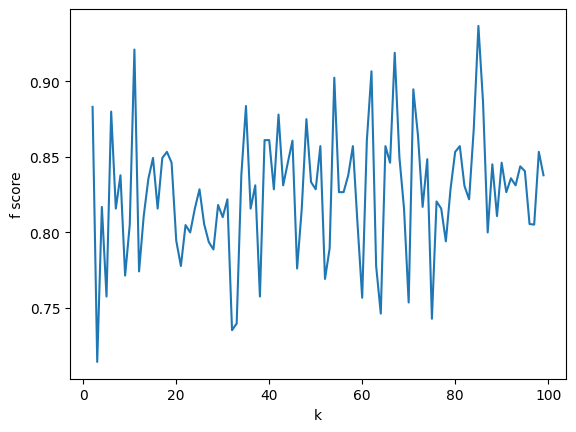

In [296]:
# Testing different values of k
def get_scores(k):
    nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')

    n = 50
    students = school_interested.sample(n)
    studentsX = students[[age, grade, tuition, scholarship]].values
    studentsY = students[['Target']].values

    studentsY = students[['Target']].values.flatten()
    studentsY = np.where(studentsY == 'Enrolled', 0, studentsY)
    studentsY = np.where(studentsY == 'Graduate', 0, studentsY)
    studentsY = np.where(studentsY == 'Dropout', 1, studentsY)
    studentsY = studentsY.reshape(-1, 1).astype(np.int64)

    distances, indices = fit.kneighbors(studentsX)

    y_pred = []
    for i in range(n):
        nbrs = school_interested.iloc[indices[i]]
        in_school = nbrs[(nbrs['Target'] == "Enrolled") | (nbrs['Target'] == "Graduate")].count()
        dropout = nbrs[nbrs['Target'] == "Dropout"].count()
        predict = 0 if (in_school['Target'] > dropout['Target']) else 1
        y_pred.append(predict)

    return precision_recall_fscore_support(studentsY, y_pred, labels=[0,1])

kvals = range(2, 100)
scores = [get_scores(k) for k in kvals]
print(scores)

scores = [(p[0], r[0], f[0], s[0]) for (p,r,f,s) in scores]
scores = list(zip(*scores))

plt.plot(kvals, scores[2])
plt.xlabel('k')
plt.ylabel('f score')

In [297]:
# Last thing...

from sklearn.model_selection import train_test_split

k = 9
nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')

X = school_interested[[age, grade, tuition, scholarship]].values
y = school_interested[['Target']].values

# Use random_state if you want the same values each time you run for debugging,
# but you should select the split randomly when you're ready to actually train
# and test on the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

# Build the model with the training data and test with the test data

# You may also want to use this function to compute the f score. The labels parameter indicates
# that label 1 is "positive" in the sense of "true positive", "false positive" etc.
# (p,r,f,s) = precision_recall_fscore_support(y_test, y_pred, labels=[1])